<a href="https://colab.research.google.com/github/0xf2/colab/blob/main/tutorial_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Tutorial: brief introduction to convolutions](https://)**

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

## **1. Reading an image**

We will start with a tiny grayscale image of just 25x25 pixels. Such a small image will allow us exploring what happens to every pixel when we apply different functions to it. 

In [2]:
# 1.1 Get image from the web repository
!wget -nv http://people.csail.mit.edu/torralba/share/course/bird25x25.jpg

2021-01-25 21:38:18 URL:http://people.csail.mit.edu/torralba/share/course/bird25x25.jpg [10934/10934] -> "bird25x25.jpg" [1]


(25, 25, 3)


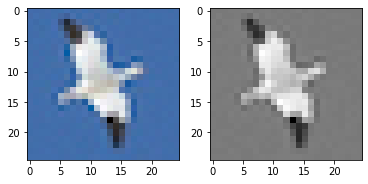

In [3]:
# 1.2 Load one image, visualize it and print its size 

# Read image
img_bgr = cv2.imread("bird25x25.jpg")

# OpenCV encodes color as B,G,R which is the opposite way on how we normaly store images. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Transfom to gray scale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Print image size
print (img_rgb.shape)

# Show the images
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)


In [ ]:
# 1.3 The image is just an array of numbers. Let's look at it.
print (img_gray)

## **2. Convolution**

In [ ]:
# 2.1 Let's start with a very simple image or 5x5 pixels:
input_img = np.array([[0,0,0,0,0],
                      [0,0,0,0,0],
                      [0,0,5,0,0],
                      [0,0,0,0,0],
                      [0,0,0,0,0]], dtype='float')
plt.imshow(input_img, cmap='gray', vmin=0, vmax=5)

In [ ]:
# We define the following convolution kernel:
kernel = np.array([[1,0,0], 
                   [0,0,0], 
                   [0,0,-1]], dtype='float')


In [ ]:
# The convolution is computed using the following function:
from scipy import signal
out_img = signal.convolve2d(input_img, kernel, 'same')
# the same 
out_img = cv2.filter2D(src=input_img, kernel=kernel, ddepth=-1, borderType=cv2.BORDER_CONSTANT)

# Let's look at the input, kernel and the result of the convolution
print('input image:')
print(input_img)
print('kernel:')
print(kernel)
print('output image:')
print(out_img)

input image:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
kernel:
[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]
output image:
[[ 0.  0.  0.  0.  0.]
 [ 0. -1.  0.  1.  0.]
 [ 0. -2.  0.  2.  0.]
 [ 0. -1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.]]


Note that the convolution kernel appears mirrored (left-right, up-down)

In [ ]:
# Show the images
plt.subplot(1,3,1)
plt.imshow(input_img, cmap='gray', vmin=0, vmax=1)
plt.title('input')
plt.subplot(1,3,2)
plt.imshow(kernel, cmap='gray', vmin=-1, vmax=1)
plt.title('kernel')
plt.subplot(1,3,3)
plt.imshow(out_img, cmap='gray', vmin=-1, vmax=1)
plt.title('output')


Text(0.5, 1.0, 'output')

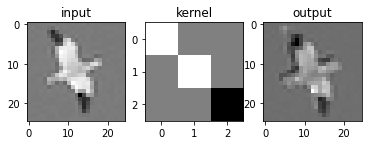

In [ ]:
# 2.2 Now let's do this the real image that we loaded a the beginning of the tutorial
# The image is stored in the variable: img_gray
kernel = np.array([[1,0,0], 
                   [0,1,0], 
                   [0,0,-1]], dtype='float')
out = cv2.filter2D(src=img_gray.astype('float'), kernel=kernel, ddepth=-1, borderType=cv2.BORDER_REFLECT)
# Note that in the convolution we use now "BORDER_REFLECT". Change that to BORDER_CONSTANT.
# BORDER_REFLECT produces the following type of padding: fedcba|abcdefgh|hgfedcb

# Show the images
plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=256)
plt.title('input')
plt.subplot(1,3,2)
plt.imshow(kernel, cmap='gray', vmin=-1, vmax=1)
plt.title('kernel')
plt.subplot(1,3,3)
plt.imshow(out, cmap='gray')
plt.title('output')

In [ ]:
# Let's look at the numbersc(just the first 5x5 values):
print('input image:')
print(img_gray[0:5,0:5])
print('kernel:')
print(kernel)
print('output image:')
print(out[0:5,0:5])

## **3. A familly of linear filters**


In [ ]:
# binomial (low-pass filter)
binomial = np.array([[1,2,1],
                   [2,4,2],
                   [1,2,1]], dtype='float')/16

# horizontal and vertical edge detection:
sobel_x = np.array([[1,0,-1],
                   [2,0,-2],
                   [1,0,-1]], dtype='float')

sobel_y = np.array([[1,2,1],
                   [0,0,0],
                   [-1,-2,-1]], dtype='float')

# Laplacian
laplacian = np.array([[0,1,0],
                   [1,-4,1],
                   [0,1,0]], dtype='float')

# Try using those filters in the section 2.2

## **4. Convolution in matrix form**

In [ ]:
# The convolution is a linear operator. 
#
# The following function transforms a convolution kernel into a matrix. This is not computationally efficient, 
# but it will let us see the convolution from a different perspective.

def getMatrixFromKernel(kernel, imagesize):
  imagesize = int(imagesize) # I assume the input image is square.

  # loop over impulses
  r = np.zeros((imagesize*imagesize, imagesize*imagesize))
  k=0
  for x in range(0,imagesize):
    for y in range(0,imagesize):
      # Delta image: create an image with a single 1
      delta = np.zeros((imagesize,imagesize))
      delta[x,y] = 1

      # Filter the delta image with the kernel
      out = cv2.filter2D(src=delta, kernel=kernel, ddepth=-1, borderType=cv2.BORDER_CONSTANT) # check what happens using BORDER_REFLECT

      # make a column vector 
      out = out.flatten()

      r[:,k] = out
      k=k+1
  return r

(25, 25)


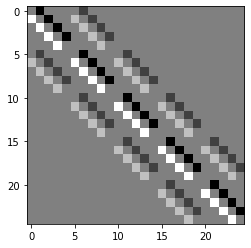

In [ ]:
# Let's check what happens with one kernel:
kernel = sobel_x
R = getMatrixFromKernel(kernel, 5)

# We can now plot the matrix equivalent to the convolution kernel:
print(R.shape)
plt.imshow(R, cmap='gray', vmin=-2, vmax=2)

(5, 5)
(25, 25)


Text(0.5, 1.0, 'output')

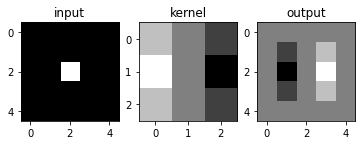

In [ ]:
# We can now check that multiplying by this matrix is equivalent to the convolution

# First let's build a simple image:
input_img = np.array([[0,0,0,0,0],
                      [0,0,0,0,0],
                      [0,0,1,0,0],
                      [0,0,0,0,0],
                      [0,0,0,0,0]], dtype='float')
# now we rasterize the image into a vector:
input_img_flat = input_img.flatten()
print(input_img.shape)
print(R.shape)

output = np.dot(R,input_img_flat)
output= np.reshape(output, (5,5))

plt.subplot(1,3,1)
plt.imshow(input_img, cmap='gray', vmin=0, vmax=1)
plt.title('input')
plt.subplot(1,3,2)
plt.imshow(kernel, cmap='gray', vmin=-2, vmax=2)
plt.title('kernel')
plt.subplot(1,3,3)
plt.imshow(output, cmap='gray', vmin=-2, vmax=2)
plt.title('output')

(25, 25)


Text(0.5, 1.0, 'output')

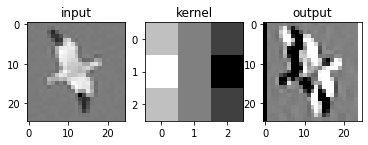

In [ ]:
# Another example:

R = getMatrixFromKernel(kernel, 25)
print(img_gray.shape)
output = np.dot(R,img_gray.flatten()).reshape((25,25))

plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)
plt.title('input')
plt.subplot(1,3,2)
plt.imshow(kernel, cmap='gray', vmin=-2, vmax=2)
plt.title('kernel')
plt.subplot(1,3,3)
plt.imshow(output, cmap='gray', vmin=-128, vmax=128)
plt.title('output')

## **5. Hybrid images**

In [ ]:
# Hybrid images are a visual illusion created by combining two images into one. One image is blurred and the other image is sharpenned.
# then we sum the two resulting images creating a new "hybrid" image that will change its identity depending on the distance at which
# we will look at it!

# load image 1: im1

# apply a gaussian filter (gaussian kernel should sum up to 1). We will call the output: g1

# load image 2: im2

# apply a gaussian filter(gaussian kernel should sum up to 1). We will call the output: g2

# compute hybrid image: h = g1 + (im2-g2)


## **6. Retinex**

In [ ]:
# First load an image. Here is the image I used in the slides:
!wget -nv http://people.csail.mit.edu/torralba/share/course/retinex_square_64x64.png

img_rgb = cv2.imread("retinex_square_64x64.png")
img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)
